In [ ]:
# Github link: https://github.com/molefethbs/credit_risk_analysis

In [24]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd

csv_file_path = 'credit_risk.csv'
df = pd.read_csv(csv_file_path)

print(df)

          Id  Age  Income      Home  Emp_length           Intent  Amount  \
0          0   22   59000      RENT       123.0         PERSONAL   35000   
1          1   21    9600       OWN         5.0        EDUCATION    1000   
2          2   25    9600  MORTGAGE         1.0          MEDICAL    5500   
3          3   23   65500      RENT         4.0          MEDICAL   35000   
4          4   24   54400      RENT         8.0          MEDICAL   35000   
...      ...  ...     ...       ...         ...              ...     ...   
32576  32576   57   53000  MORTGAGE         1.0         PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   
32578  32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000   
32579  32579   56  150000  MORTGAGE         5.0         PERSONAL   15000   
32580  32780   66   42000      RENT         2.0          MEDICAL    6475   

        Rate  Status  Percent_income Default  Cred_length  
0      16.02       1       

In [2]:
# check for missing values
csv_file_path = 'credit_risk.csv'
df = pd.read_csv(csv_file_path)

missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


In [3]:
# clean the missing data
import pandas as pd

csv_file_path = 'credit_risk.csv'
df = pd.read_csv(csv_file_path)

# Set the null values on Emp_length(employment length) column to the mean
emplength_mean = df['Emp_length'].mean()
df['Emp_length'] = df['Emp_length'].fillna(emplength_mean)

# remove the null records from Rate column since this is a crucial column we will use for the analysis
df = df[df['Rate'].notnull()]

# Drop the ID column
df.drop(columns=['Id'], inplace=True)

# Save the updated records into new csv file
df.to_csv('credit_risk_analysis.csv', index=False)

new_df = pd.read_csv('credit_risk_analysis.csv')
print(new_df.isnull().sum())

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [4]:
# Descriptive Analysis on all columns
df = pd.read_csv('credit_risk_analysis.csv')
df.describe().round(2)

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,29465.00,29465.00,29465.00,29465.00,29465.00,29465.00,29465.00,29465.00
mean,27.71,66020.47,4.79,9584.74,11.01,0.22,0.17,5.79
std,6.30,61901.42,4.10,6316.27,3.24,0.41,0.11,4.03
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79100.00,7.00,12250.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


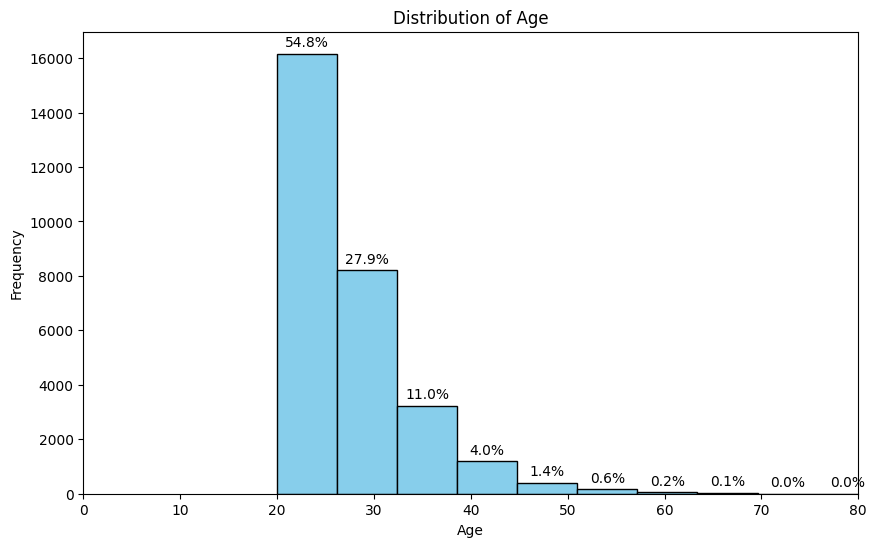

In [5]:
# Age analysis
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_risk_analysis.csv')

# Distribution of Age Visualization
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80) 
plt.grid(False)

# Add percentages on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().annotate(f'{height / len(df) * 100:.1f}%', 
                       xy=(rect.get_x() + rect.get_width() / 2, height), 
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

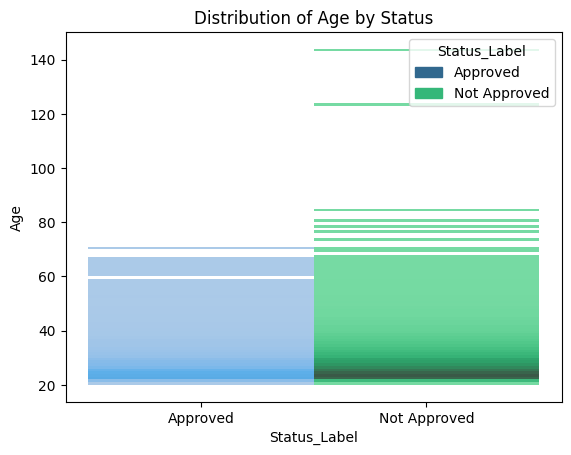

In [6]:
# Distribution of Age by Loan Application Status visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Open dataset
df = pd.read_csv('credit_risk_analysis.csv')

status_labels = {1: 'Approved', 0: 'Not Approved'}
df['Status_Label'] = df['Status'].map(status_labels)

sns.histplot(data=df, x='Status_Label', y='Age',hue='Status_Label', palette='viridis', binwidth=1)
plt.xlabel('Status_Label')
plt.ylabel('Age')
plt.title('Distribution of Age by Status')
plt.show()


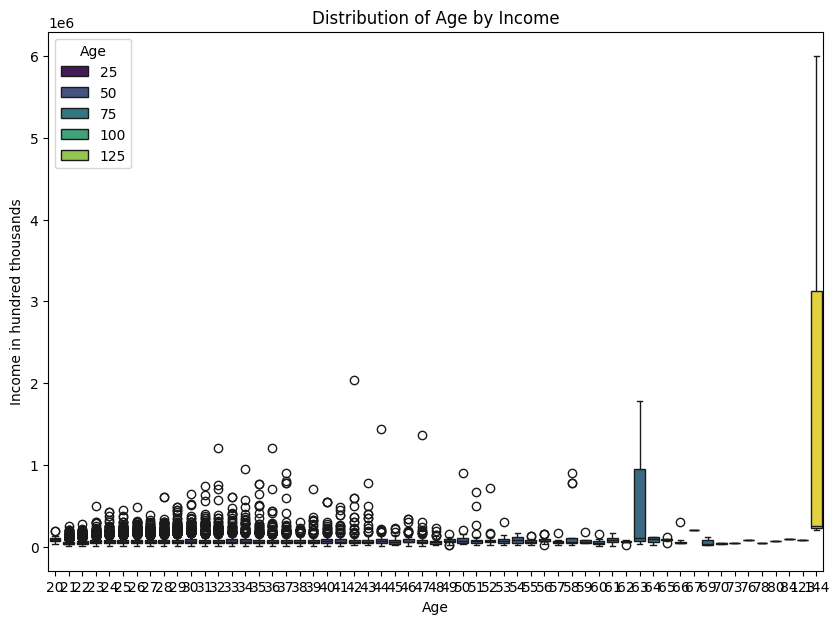

In [7]:
# Distribution of Age by Income visualization
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_risk_analysis.csv')

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Age', y='Income',hue='Age', palette='viridis')
plt.title('Distribution of Age by Income')
plt.xlabel('Age')
plt.ylabel('Income in hundred thousands')
plt.grid(False)
plt.show()

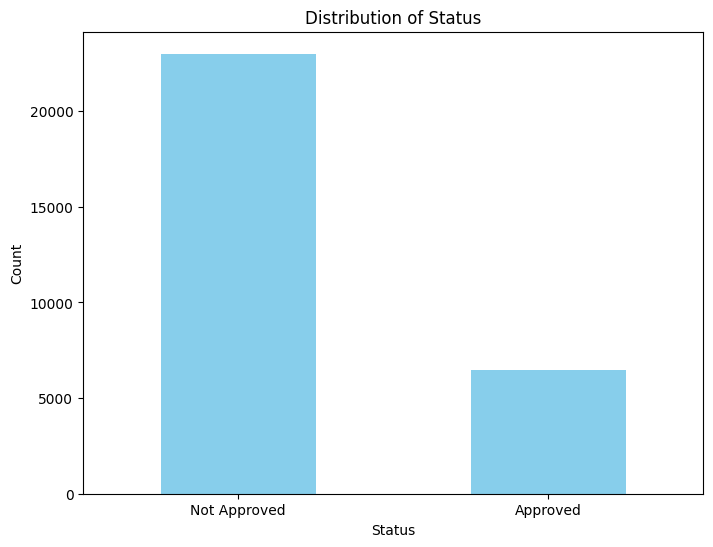

In [8]:
# Distribution of Loan Status
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of each status
status_labels = {1: 'Approved', 0: 'Not Approved'}
df['Status_Label'] = df['Status'].map(status_labels)
status_counts = df['Status_Label'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [9]:
# Summary Statistics of Income, Employment Length, and Credit Length by Loan Approval Status
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_analysis.csv')

status_labels = {1: 'Approved', 0: 'Not Approved'}
df['Status_Label'] = df['Status'].map(status_labels)

summary_stats = df.groupby('Status_Label')[['Income', 'Emp_length', 'Cred_length']].describe().round(2)
summary_stats_transposed = summary_stats.T
summary_stats_table = summary_stats_transposed.to_string()
print(summary_stats_table)


Status_Label        Approved  Not Approved
Income      count    6464.00      23001.00
            mean    49211.96      70744.19
            std     36595.38      66563.10
            min      4000.00       7200.00
            25%     30000.00      42000.00
            50%     41655.00      60000.00
            75%     59973.00      84000.00
            max    703800.00    6000000.00
Emp_length  count    6464.00      23001.00
            mean        4.16          4.96
            std         4.07          4.08
            min         0.00          0.00
            25%         1.00          2.00
            50%         3.00          4.00
            75%         6.00          7.00
            max       123.00        123.00
Cred_length count    6464.00      23001.00
            mean        5.68          5.82
            std         4.09          4.02
            min         2.00          2.00
            25%         3.00          3.00
            50%         4.00          4.00
           

In [ ]:
# Distribution of Employment Length, Income and Credit Length by Loan Status
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_analysis.csv')

status_labels = {1: 'Approved', 0: 'Not Approved'}
df['Status_Label'] = df['Status'].map(status_labels)

fig, axes = plt.subplots(3, 1, figsize=(18, 15))

sns.histplot(data=df, x='Income', hue='Status_Label', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Income by Status')

sns.histplot(data=df, x='Emp_length', hue='Status_Label', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Employment Length by Status')

sns.histplot(data=df, x='Cred_length', hue='Status_Label', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Credit Length by Status')
plt.tight_layout()
plt.show()


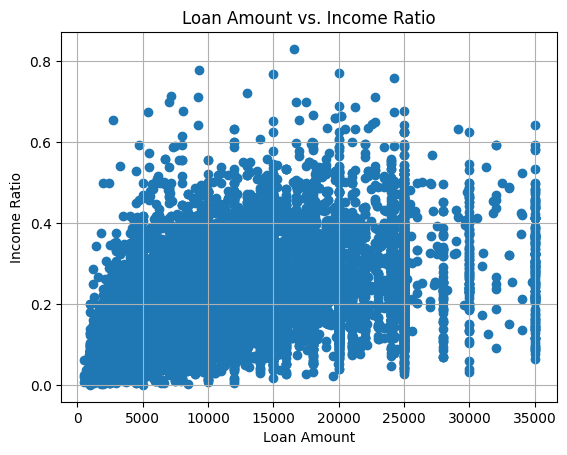

In [15]:
# Distribution of income ratio per Loan Amount
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_analysis.csv')

# Calculate the income ratio (loan amount / income)
df['Income_ratio'] = df['Amount'] / df['Income']

income_ratio = df['Income_ratio']

plt.scatter(df['Amount'], df['Income_ratio'])
plt.xlabel('Loan Amount')
plt.ylabel('Income Ratio')
plt.title('Loan Amount vs. Income Ratio')
plt.grid(True)
plt.show()

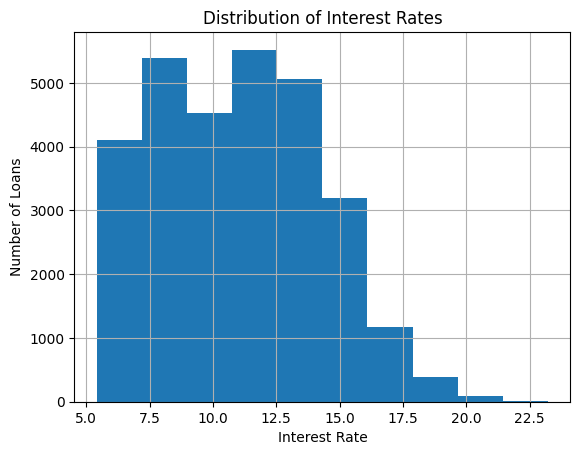

In [16]:
# Distribution of Interest Rates
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_analysis.csv')

plt.hist(df['Rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Number of Loans')
plt.title('Distribution of Interest Rates')
plt.grid(True)
plt.show()

                    count       mean       std   min   25%    50%    75%  \
Intent                                                                     
DEBTCONSOLIDATION  4703.0  10.983268  3.262951  5.42  7.88  10.99  13.48   
EDUCATION          5854.0  10.950261  3.187728  5.42  7.90  10.99  13.23   
HOMEIMPROVEMENT    3290.0  11.201152  3.352866  5.42  7.90  11.14  13.61   
MEDICAL            5451.0  11.060194  3.230535  5.42  7.90  10.99  13.48   
PERSONAL           5014.0  10.998221  3.228400  5.42  7.90  10.99  13.43   
VENTURE            5153.0  10.948275  3.224660  5.42  7.88  10.99  13.24   

                     max  
Intent                    
DEBTCONSOLIDATION  22.11  
EDUCATION          21.74  
HOMEIMPROVEMENT    23.22  
MEDICAL            21.74  
PERSONAL           21.74  
VENTURE            22.48  


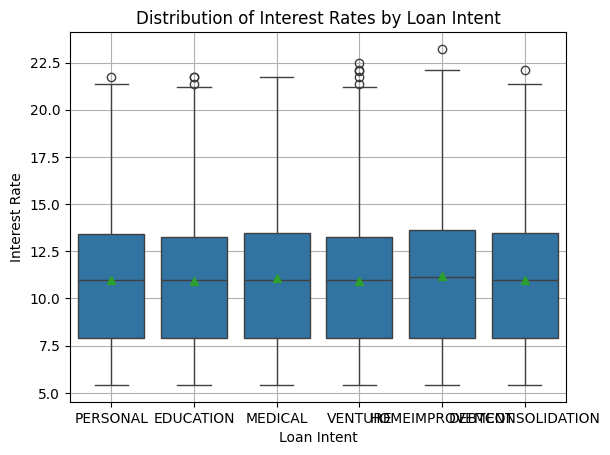

In [17]:
# Distribution of Interest Rates by Loan Intent
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_analysis.csv')

interest_rates_by_intent = df.groupby('Intent')['Rate'].describe()
print(interest_rates_by_intent)

sns.boxplot(
    x = "Intent",
    y = "Rate",
    showmeans=True,
    data=df
)
plt.xlabel('Loan Intent')
plt.ylabel('Interest Rate')
plt.title('Distribution of Interest Rates by Loan Intent')
plt.grid(True)
plt.show()


In [1]:
# Reflections

This assessment was more fun to do as it required us to code and learn new things, 
like how to use different libraries to create different kinds of visualisations.
The previous one was also fun and bit challenging as I do not usually work with spreadsheet,
it was a bit challenging to create formulas. What I found different about Excel and Python is the way they both handle calculations.
With Excel, you must specify the range of the dataset, if the dataset increases, there would be a need to update the range in my formulas.
With Python, we can write a formula that will always accommodate any range of dataset.
I noticed that with Excel we have a great deal of control in terms of using data visualization tools. The user interface is easy to use,
and it makes it easier to design the visualizations. With Python, for every design there is an extra code that needs to go into the codebase.
In terms of when to use which, I would use Excel on small dataset and Python on large datasets.
It is easier to analyse the complex dataset with Python compared to Excel, and it’s also easier to do calculations with Python than with Excel.
And in terms of designing the data visuals I would prefer to use Excel. If I would do this assignment again,
I would try to learn different types of calculations or formulas and apply them to this assignment. In terms of Stats knowledge,
I would say the uncertainty of knowing what calculations to use to come to a conclusion,
and also not knowing how to correlate different types of columns to come to a conclusion.
In terms of Programming, the gaps I noticed are in coming with code to put the logic into code. Also coming with calculations to derive concussions.
I believe the gaps are also in using different types of libraries,
I have realised that Python has too many libraries and some of them are almost similar, they can perform the same tasks as the others.
The challenge is not knowing which to use. 

In [2]:
# Conclusions

1. Distribution of interest rates is evenly spread between Loan Intent (Purpose)
2. There are more Not Approved Loan Statuses compared to the Approved ones
3. More loan amounts are on the 7.5% interest rate and 12.5%
4. Age group between 20 and 25 apply for more loans than any age group